In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Using Glass Dataset

Objective here is to tell the type of Glass based on amount of other element present.

In [3]:
data = pd.read_csv('glass.csv')
data.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [4]:
data.describe()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,2.780374
std,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439,2.103739
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,1.516522,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000,1.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000,2.000000
75%,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000,3.000000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


In [10]:
data.isna().sum() # No Null Values

RI      0
Na      0
Mg      0
Al      0
Si      0
K       0
Ca      0
Ba      0
Fe      0
Type    0
dtype: int64

In [11]:
# Dropping Type column:
data = data.drop('Type', axis=1)

In [12]:
data

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0
...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0


Mean !=, hence calling Standard Scaler for PCA:

In [13]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

scaled_data = scaler.fit_transform(data)

In [19]:
df = pd.DataFrame(data= scaled_data, columns= data.columns)

In [22]:
df.describe()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
count,2.140000e+02,2.140000e+02,2.140000e+02,2.140000e+02,2.140000e+02,2.140000e+02,2.140000e+02,2.140000e+02,2.140000e+02
mean,-2.877449e-14,2.179980e-15,-2.801497e-16,-3.434428e-16,9.966067e-16,7.470660e-17,-3.137418e-16,-1.763906e-16,-6.121791e-17
std,1.002345e+00,1.002345e+00,1.002345e+00,1.002345e+00,1.002345e+00,1.002345e+00,1.002345e+00,1.002345e+00,1.002345e+00
min,-2.381516e+00,-3.286943e+00,-1.865511e+00,-2.318616e+00,-3.676472e+00,-7.639186e-01,-2.484084e+00,-3.528768e-01,-5.864509e-01
25%,-6.082728e-01,-6.141580e-01,-3.957744e-01,-5.117560e-01,-4.800288e-01,-5.756501e-01,-5.049657e-01,-3.528768e-01,-5.864509e-01
50%,-2.262293e-01,-1.323817e-01,5.527787e-01,-1.704602e-01,1.799655e-01,8.905322e-02,-2.514132e-01,-3.528768e-01,-5.864509e-01
75%,2.614331e-01,5.120326e-01,6.361680e-01,3.715977e-01,5.649621e-01,1.735820e-01,1.518057e-01,-3.528768e-01,4.422417e-01
max,5.137232e+00,4.875637e+00,1.254639e+00,4.125851e+00,3.570524e+00,8.780145e+00,5.094318e+00,5.997210e+00,4.659881e+00


Now, Mean is approximately 0

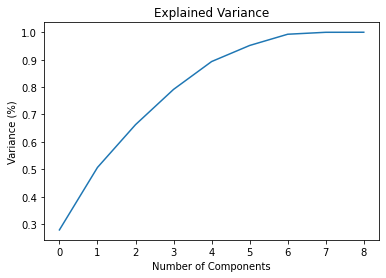

In [29]:
# Finding number of Principal Components for entire dataset:

from sklearn.decomposition import PCA
pca = PCA()
principal_components = pca.fit_transform(df)

plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Variance (%)') # For each component
plt.title('Explained Variance')
plt.show()



From the figure above, it is clear that 4 Principal Components explain ~90% of variance in data.and 5 principal components explain around 95% of avariance in data.

So, instead of giving all columns as input, we'd only feed these 4 PC of data to the Machine Learning algo.

In [30]:
pca = PCA(n_components=4)
new_data = pca.fit_transform(df)
# This is the new data fed to the algorithm.

principal_df = pd.DataFrame(data = new_data, columns=['PC1', 'PC2', 'PC3', 'PC4'])

In [31]:
principal_df.head()

,PC1,PC2,PC3,PC4
0,1.151140,-0.529488,-0.372096,1.728901
1,-0.574137,-0.759788,-0.556708,0.760232
2,-0.940160,-0.929836,-0.554907,0.206254
3,-0.142083,-0.961677,-0.117125,0.415724
4,-0.351092,-1.091249,-0.485079,0.069102


This is how we reduced the dimensions from 9 to 4 using PCA

# Next Example:
## Manually to find PCs with random data:

In [119]:
df2 = np.random.rand(50,5)
df2

array([[2.95879058e-02, 1.53916054e-01, 9.09898352e-01, 1.40579160e-01,
        2.22960508e-01],
       [4.50739711e-01, 6.16116415e-01, 8.69036953e-01, 4.61164364e-01,
        6.96479687e-01],
       [7.56511839e-01, 4.87956757e-01, 2.14895702e-01, 6.12709974e-01,
        5.87600980e-01],
       [9.03298824e-02, 9.18679658e-01, 6.66805681e-02, 8.12700626e-02,
        3.35970844e-01],
       [7.92852980e-01, 4.05346009e-02, 6.41338759e-01, 5.91375210e-01,
        2.58012734e-01],
       [9.04865385e-01, 5.34326293e-01, 7.23759218e-01, 1.31864247e-01,
        9.06063082e-01],
       [9.39905927e-01, 4.24797748e-01, 8.08865382e-01, 8.21252034e-01,
        8.16936925e-01],
       [3.69082527e-01, 8.95042316e-01, 2.59175605e-01, 5.57441661e-01,
        1.17820236e-01],
       [7.47496114e-01, 6.15849777e-01, 3.13522460e-01, 9.71475092e-01,
        8.82485230e-01],
       [3.79033777e-01, 5.64149403e-01, 7.31024486e-01, 9.11282970e-01,
        8.40723648e-01],
       [9.49635401e-01, 7.7109

In [120]:
a0,a1,a2,a3,a4 = df[:,0],df[:,1],df[:,2],df[:,3],df[:,4]

In [121]:
# Finding covariances:
sig = np.cov([a0,a1,a2,a3,a4])

In [122]:
sig

array([[ 0.07891017,  0.00519834,  0.00226349,  0.01168451, -0.00316027],
       [ 0.00519834,  0.06020221, -0.00092118,  0.00895889,  0.00415707],
       [ 0.00226349, -0.00092118,  0.06862315,  0.00020072,  0.00945111],
       [ 0.01168451,  0.00895889,  0.00020072,  0.08272189,  0.01202528],
       [-0.00316027,  0.00415707,  0.00945111,  0.01202528,  0.08267833]])

In [123]:
# Finding Eigen Values and Eigen Vectors:
l, x = np.linalg.eig(sig)

In [124]:
l # Eigen Values # First one has highest Eigen value: Hence first vector will be PC1 and PC2 will be 4th vector

array([0.10128208, 0.08556006, 0.07069307, 0.05904244, 0.05655809])

In [125]:
x # Eigen Vectors

array([[-0.36478427, -0.65383365,  0.50855698,  0.37358768,  0.20306658],
       [-0.24858413, -0.10671852, -0.15865148,  0.27970501, -0.90742047],
       [-0.17738174,  0.2858182 ,  0.73374379, -0.52264992, -0.27440989],
       [-0.69818196, -0.20077374, -0.42044238, -0.52891081,  0.12535317],
       [-0.53499162,  0.66265419,  0.03236907,  0.47884003,  0.21056557]])

In [128]:
# PC1 is the first row:
col1 = df2@ x[:,0]

In [129]:
# PC1 is the fourth row:
col2 = df2 @ x[:,3]

In [130]:
col2

array([-0.38904495, -0.0238929 ,  0.26409018,  0.37374652, -0.21689573,
        0.47334245,  0.00401493,  0.01435452,  0.1963947 , -0.16208739,
        0.54454225, -0.1312036 , -0.01229276,  0.01806828,  0.42814081,
        0.28196097, -0.16242004,  0.09519687, -0.04369417,  0.37461553,
       -0.13472559, -0.46134205,  0.31089209,  0.60898294, -0.27031965,
        0.10031137,  0.23202849, -0.01231262, -0.06329433, -0.01760103,
        0.44436921, -0.14763255, -0.07366728,  0.10692667,  0.07618199,
        0.01480693,  0.37190781, -0.20809748,  0.2792608 , -0.11236463,
       -0.23682163,  0.02361841,  0.44373275, -0.33395089,  0.30461922,
       -0.07770782, -0.23377997,  0.30175092,  0.12857456,  0.55307095])

### So here, we have 2 Columns instead of 5